In [10]:

from typing_extensions import TypedDict
from IPython.display import Image, display



from langgraph.graph import StateGraph, START, END

from typing import Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    message: Annotated[list,add_messages]

In [11]:

import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

print("GROQ_API_KEY")

GROQ_API_KEY


In [19]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")



In [24]:
def superbot(state):
    return {"message":llm.invoke(state["message"])}

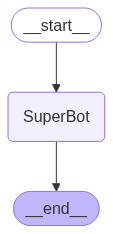

In [25]:
graph = StateGraph(State)
graph.add_node("SuperBot",superbot)
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)


graph_builder= graph.compile()



#display
display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [26]:
graph_builder.invoke({"message":"what is the most difficult language to learn?"})

{'message': [HumanMessage(content='what is the most difficult language to learn?', additional_kwargs={}, response_metadata={}, id='9b37edda-1557-4084-9dc8-68a6ba1b06b9'),
  AIMessage(content='There isn\'t a single definitive answer to the question of which language is the most difficult to learn. \n\n**Difficulty is subjective and depends on several factors, including:**\n\n* **Your native language:** Languages that are structurally similar to your own will generally be easier to learn. For example, a Spanish speaker might find Italian relatively easy, while a Mandarin speaker might find English more challenging.\n\n* **Your language learning experience:** If you\'ve already learned several languages, you\'ll likely find it easier to learn new ones.\n\n* **Your motivation and learning style:**  A language you\'re passionate about and learn in a way that suits you will be less daunting.\n\n* **Exposure and resources:** Languages with readily available learning materials and opportunitie